In [1]:
import pandas as pd


In [16]:
df = pd.read_csv("../ozone project/final_merged.csv")




In [17]:
df.head(5)

,Unnamed: 0,lat,lon,RH,U,V,QV,T,time,weightedMeanO3
0,0,56.0,7.5,0.800717,-13.585140,3.725996,0.002572,271.011611,1996-01-01,29.751860
1,1,46.0,-122.5,0.898898,-0.016807,1.728883,0.005204,278.469478,1996-01-01,6.217391
2,2,46.0,-102.5,0.862283,4.652367,-6.664802,0.002233,266.765017,1996-01-01,23.416667
3,3,46.0,-97.5,0.951425,-1.605404,-1.991173,0.002368,267.066920,1996-01-01,18.583333
4,4,46.0,-92.5,0.927911,-7.111815,-2.292224,0.002714,269.141948,1996-01-01,16.000000


In [18]:

# Drop the first column (index 0)
df = df.drop(df.columns[0], axis=1)


df.head()

,lat,lon,RH,U,V,QV,T,time,weightedMeanO3
0,56.0,7.5,0.800717,-13.585140,3.725996,0.002572,271.011611,1996-01-01,29.751860
1,46.0,-122.5,0.898898,-0.016807,1.728883,0.005204,278.469478,1996-01-01,6.217391
2,46.0,-102.5,0.862283,4.652367,-6.664802,0.002233,266.765017,1996-01-01,23.416667
3,46.0,-97.5,0.951425,-1.605404,-1.991173,0.002368,267.066920,1996-01-01,18.583333
4,46.0,-92.5,0.927911,-7.111815,-2.292224,0.002714,269.141948,1996-01-01,16.000000


In [19]:
# Drop the specified column
df = df.drop("time", axis=1)
df.head()


,lat,lon,RH,U,V,QV,T,weightedMeanO3
0,56.0,7.5,0.800717,-13.585140,3.725996,0.002572,271.011611,29.751860
1,46.0,-122.5,0.898898,-0.016807,1.728883,0.005204,278.469478,6.217391
2,46.0,-102.5,0.862283,4.652367,-6.664802,0.002233,266.765017,23.416667
3,46.0,-97.5,0.951425,-1.605404,-1.991173,0.002368,267.066920,18.583333
4,46.0,-92.5,0.927911,-7.111815,-2.292224,0.002714,269.141948,16.000000


Finding correlation between variables.

In [20]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)


                     lat       lon        RH         U         V        QV  \
lat             1.000000  0.471376  0.293875  0.107608 -0.045348 -0.449378   
lon             0.471376  1.000000  0.325626 -0.036494  0.014872 -0.042233   
RH              0.293875  0.325626  1.000000 -0.054096  0.105824  0.126827   
U               0.107608 -0.036494 -0.054096  1.000000 -0.043110 -0.145690   
V              -0.045348  0.014872  0.105824 -0.043110  1.000000  0.274571   
QV             -0.449378 -0.042233  0.126827 -0.145690  0.274571  1.000000   
T              -0.500039 -0.138461 -0.368779 -0.116229  0.222870  0.815366   
weightedMeanO3 -0.136656 -0.153370 -0.416983  0.078036  0.023375  0.094691   

                       T  weightedMeanO3  
lat            -0.500039       -0.136656  
lon            -0.138461       -0.153370  
RH             -0.368779       -0.416983  
U              -0.116229        0.078036  
V               0.222870        0.023375  
QV              0.815366        0.09469

Using the correlation matrix to form a heatmap.

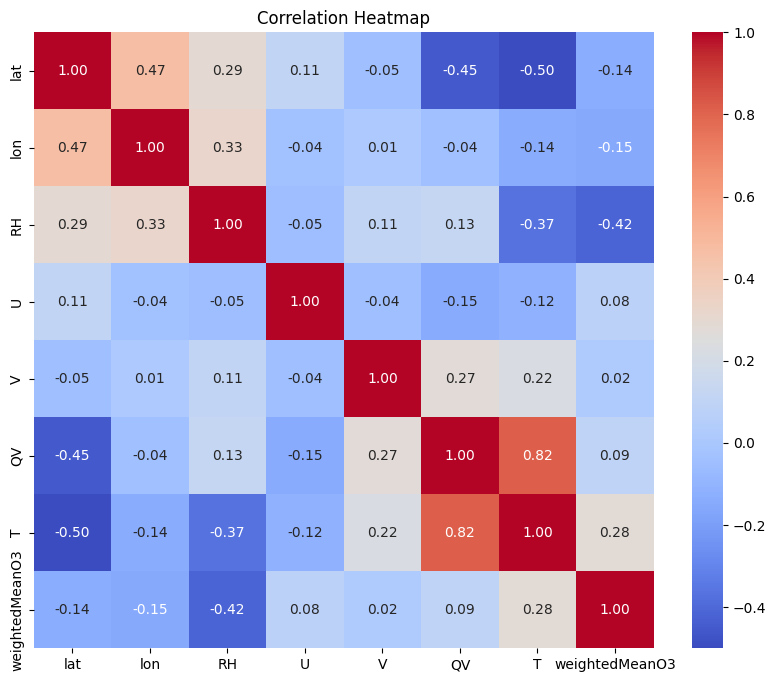

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [25]:
print(df.iloc[:, :6]
.shape)
print(len(df['weightedMeanO3']))


(62914, 6)
62914


Using Ensemble method like random forest to assess feature importance.

In [26]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()
model.fit(df.iloc[:, :6], df['weightedMeanO3'])

# Access feature importance scores
feature_importance = model.feature_importances_


In [27]:
# Sorted feature importance score

print(feature_importance)

[0.12994489 0.14738123 0.27919328 0.1222078  0.12820459 0.19306822]


In [29]:

from scipy.stats import pearsonr

# Assuming df is your DataFrame
correlations = {}
target_variable = 'weightedMeanO3'

for column in df.columns:
    if column != target_variable:
        corr, _ = pearsonr(df[column], df[target_variable])
        correlations[column] = abs(corr)

# Sort by correlation values to find the most important predictors
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
print(sorted_correlations)

[('RH', 0.4169827995154151), ('T', 0.2795915937381959), ('lon', 0.15337032471149822), ('lat', 0.13665614214501048), ('QV', 0.09469068392695584), ('U', 0.07803565165754106), ('V', 0.02337456975036202)]
